In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import modules
from widgets import CandlestickWidget
#%matplotlib qt

In [2]:
out_dir = "./data/out"
series_dir = os.path.join(out_dir, "best-series_")

In [3]:
series_dir

'./data/out/best-series_'

In [4]:
def get_series(csv_path, col_names, sep=',', time_col="time"):
    series_ = pd.read_csv(csv_path, sep, header=None, names=col_names)
    series_[time_col] = series_[time_col].apply(lambda x: datetime.utcfromtimestamp(x))
    series_.set_index(time_col, inplace=True)
    return series_

In [5]:
# get series_
close_balance_series = get_series(os.path.join(series_dir, "close-balance-series_.csv"), ["time", "value"])
equity_series = get_series(os.path.join(series_dir, "equity-series_.csv"), ["time", "value"])
open_order_series = get_series(os.path.join(series_dir, "open-order-series_.csv"), ["time", "price"])
close_order_series = get_series(os.path.join(series_dir, "close-order-series_.csv"), ["time", "price"])

In [6]:
# get last position first open order time
bef_last_close_order = close_order_series.iloc[-2].name
open_order_series = open_order_series.loc[open_order_series.index >= bef_last_close_order]
last_pos_first_open_order = open_order_series.iloc[0].name

In [7]:
close_balance_series = close_balance_series.iloc[-2:]
equity_series = equity_series.loc[equity_series.index >= last_pos_first_open_order]
close_balance_series.rename(index={close_balance_series.iloc[0].name:last_pos_first_open_order}, inplace=True)

In [8]:
close_balance_series.iloc[-2:]

,value
time,
2021-12-04 05:27:00,38899.195312
2021-12-04 14:49:00,42323.984375


In [9]:
equity_series.head(1)

,value
time,
2021-12-04 05:27:00,38850.59375


In [10]:
equity_series.tail(1)

,value
time,
2021-12-04 14:49:00,42323.984375


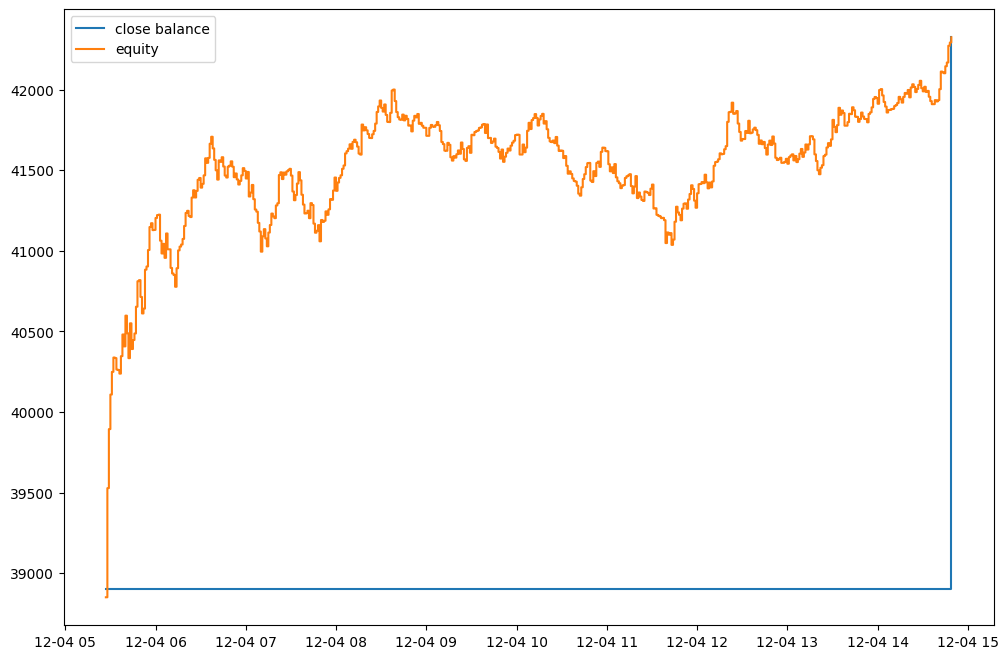

In [11]:
# plot last position
fig, ax = plt.subplots(figsize=(12, 8))
ax.step(close_balance_series.index, close_balance_series["value"], where='post', label="close balance")
ax.step(equity_series.index, equity_series["value"], where="post", label="equity")
ax.legend();